In [1]:
# !pip install hdfs
# ref : https://hdfscli.readthedocs.io/en/latest/quickstart.html#python-bindings

In [2]:
from hdfs import InsecureClient # 하둡 서버와 연결하는 클라리언트 객체 모듈
# InsecureClient라는 것이 하둡서버와 연결하는 클라리언트 객체 모듈
# 이 용도는 hdfs접근에만 한함

import requests
# 웹 api를 사용하기 위해

import json #제이슨기능사용을 위해
import datetime as dt

## 코로나 data Pipleline
1. 데이터 수집 후 dw인 hdfs에 저장 : 현재 note에서 프로그래밍
2. dw에 있는 data를 가공 처리해서 dw db에 저장 : 15번, 16 노트에서 진행
3. dw db에 있는 data를 가공 처리 해서 dm db에 저장 : 15, 17번 노트

### DataW에 DataL(web으로 간주)의 필요 data를 이동 저장 단계
- Lake에서 HDFS로 이동 저장
1. corona 발생현환(일간데이터) : api 수집
2. corona 예방접종현황(일간데이터) : web 페이지 크롤링
3. 인구 사회 데이터 : 파일 데이터
- 1,2 번 데이터는 Json 형식으로 변환 후 hdfs에 저장
- 3번 데이터는 파일 그대로 hdfs에 저장

## HDFS handle
- hdfs의 node들의 관리 서버는 localhost:9800이다.
- http 연결 웹 이용 서버 연결은 http://localhost:9870(이게 기본값임)

In [3]:
## hdfs client 연결 객체 생성
# InsecureClient(연결할 hdfs 서버 주소:포트, user = 사용자계정)
client = InsecureClient('http://localhost:9870', user = 'root')

## hdfs로 부터 읽기

In [4]:
# client 객체 사용 file 읽어오기
# hdfsclient.read(파일명) : 해당파일에 대해 읽기위한연결을 생성
# 생성객체.read() # byte코드로 읽어온다.
with client.read('/rdd/score.txt') as reader :
    score = reader.read()

In [5]:
score

b'\xea\xb9\x80\xec\xb2\xa0\xec\x88\x98 \xec\x8a\xa4\xed\x8c\x8c\xed\x81\xac 50\r\n\xed\x99\x8d\xea\xb8\xb8\xeb\x8f\x99 \xec\x8a\xa4\xed\x8c\x8c\xed\x81\xac 80\r\n\xec\x9e\x84\xea\xba\xbd\xec\xa0\x95 \xec\x8a\xa4\xed\x8c\x8c\xed\x81\xac 60\r\n\xec\x9e\x84\xec\x9a\x94\xed\x99\x98 \xed\x85\x90\xec\x84\x9c\xed\x94\x8c\xeb\xa1\x9c\xec\x9a\xb0 100\r\n\xed\x99\x8d\xec\xa7\x84\xed\x98\xb8 \xed\x85\x90\xec\x84\x9c\xed\x94\x8c\xeb\xa1\x9c\xec\x9a\xb0 22\r\n\xed\x99\x8d\xec\xa7\x84\xed\x98\xb8 \xed\x85\x90\xec\x84\x9c\xed\x94\x8c\xeb\xa1\x9c\xec\x9a\xb0 22\r\n\xec\x9d\xb4\xec\x9c\xa4\xec\x97\xb4 \xed\x85\x90\xec\x84\x9c\xed\x94\x8c\xeb\xa1\x9c\xec\x9a\xb0 90\r\n\xec\xb5\x9c\xec\x97\xb0\xec\x84\xb1 \xec\x9e\xa5\xea\xb3\xa0 100'

In [6]:
# 바이트코드 변환 가이드:
# -> https://docs.python.org/ko/3/library/stdtypes.html#bytes-and-bytearray-operations

score_data = bytes.decode(score)
print(score_data)


김철수 스파크 50
홍길동 스파크 80
임꺽정 스파크 60
임요환 텐서플로우 100
홍진호 텐서플로우 22
홍진호 텐서플로우 22
이윤열 텐서플로우 90
최연성 장고 100


## hdfs에 쓰기

- hdd(note 디렉터리)에 있는 data를 hdfs로 이동
- 1. 로컬 데이터 파일을 열기
- 2. hdfs client 통해서 쓰기 모듈 사용 등록
- 3. 로컬 파일의 내용을 한줄씩 읽어서 -> hdfs에 쓰기

- open('./data/corona_data/sido_area.csv',encoding='CP949') <- 얘는 로컬에 연결되어 있는것.
-  client.write('/corona_data/sido_area_tmp.csv') as writer: <- 얘는 하둡 hdfs에 연결되어 있는것.


In [9]:
# 이것 실행해야함
# with open('./data/corona_data/sido_area.csv',encoding='CP949') as reader, client.write('/corona_data/sido_area_tmp.csv') as writer:
#     for line in reader :
#         writer.write(line.encode('CP949'))

In [8]:
# # 폴더 째로 전송 - hdfs.upload(저장할곳, 원본)
# client.upload('/corona_data/loc', './data/corona_data')

In [7]:
# 폴더를 옮기는것도 했었음.
# 옮길 주체 폴더 안으로 들어와서 옮길 위치로 보낸다.
# 옮길폴더 안에서 진행
# hdfs dfs -copyFromLocal . /corona_data

## hdfs에 수정하기
- hdfs.client.write(파일명,'수정내용', append=True)

In [10]:
# client.write('/rdd/score.txt','최연성 장고 100'.encode('UTF-8'),append=True)

In [11]:
# 추가되었나 확인

with client.read('/rdd/score.txt') as reader :
    score = reader.read()
score_data = bytes.decode(score)
print(score_data)


김철수 스파크 50
홍길동 스파크 80
임꺽정 스파크 60
임요환 텐서플로우 100
홍진호 텐서플로우 22
홍진호 텐서플로우 22
이윤열 텐서플로우 90
최연성 장고 100


## hdfs 권한 수정

In [12]:
# client.set_permission('/corona_data/loc','777')

## hdfs 삭제

In [13]:
# client.delete('/corona_data/loc/sido_area.xlsx')

## 코로나 발생현황 데이터와 코로나 백신 형황 데이터 수집 및 dw에 저장

### 공공데이터 REST_API 통해서 데이터 수집 후 hdfs에 저장
1. 일간 코로나 발생 데이터(전국)

## REST_API로 데이터를 호출해 HDFS에 저장
- restapi 연결을 위한 객체 생성 : request모듈 사용할것
  - 함수로 구성할것
- 일간 데이터이기 때문에 어느시점 데이터를 다운받을 것인지
  - 시점생성 함수를 만들것이다

In [14]:
def executeRestApi(method, url, headers, params):  
    
    # raise Exception('응답코드 : 500')  # 예외 테스트
    # err_num = 10/0 # 예외 테스트
    if method == "get":
        res = requests.get(url, params=params, headers=headers)
    else:
        res = requests.post(url, data=params, headers=headers)

    if res == None or res.status_code != 200:
        raise Exception('응답코드 : ' + str(res.status_code))
       
    return res.text



### 기준일자 함수

In [15]:
# 현재 날짜로부터 befor_day 만큼 이전의 날짜를 생성해주는 함수
def cal_std_day(befor_day):   
    x = dt.datetime.now() - dt.timedelta(befor_day) # 현재보다 며칠 떨어진..
    year = x.year
    month = x.month if x.month >= 10 else '0'+ str(x.month)
    day = x.day if x.day >= 10 else '0'+ str(x.day)  
    return str(year)+ '-' +str(month)+ '-' +str(day)

In [16]:
cal_std_day(200)

'2023-06-10'

### logger 사용
- log를 기록해주는 객체(관련 패키지 존재 : logging)
- 외부 연결 시 오류상태 확인 위해서 사용자 정의 log 사용 가능해야 함
- restapi는 외부 서버 연결이므로 log 기록
- 로그 관련 디렉터리 필요
    1. 로그 관련 패키지 import (import logging)
    2. 로그 관리 객체 logger 생성 (logging.getLogger('로거이름'))
    3. 로그 파일 핸들러 생성 (logging.FileHandler('로그파일명.log'))
    4. 로거에 파일핸들러 추가(logger.addHandler(파일핸들러객체명))

In [17]:
# 해당 디렉토리에 log, rest_api 폴더 만들기

In [19]:
import logging

- 아래 log 만드는 코드 프로젝트나 자동화 진행시에는 함수로 생성하는게 일반적
  

In [20]:
co_logger = logging.getLogger('corona_api')
f_handler = logging.FileHandler('./log/rest_api/'+cal_std_day(0)+'.log')
co_logger.addHandler(f_handler)

In [21]:
# # 이렇게 문자열로 찍을 수도 있음
# # json양식으로 log를 저장하면 다음에 읽어와서 처리하기도 편하다.
# # 에러 내보자
# co_logger.error('corona_patient_'+cal_std_day(0)+'.json 다운로드 실패')

- 위에서 강제 발생시킨 에러에 대한 log는 ./log/rest_api/'+cal_std_day(0)+'.log 로그 파일에서 확인해야 함

### api 호출

In [22]:
# api 호출을 위해 url, 서비스키, 파일dir을 등록해줘야 한다.

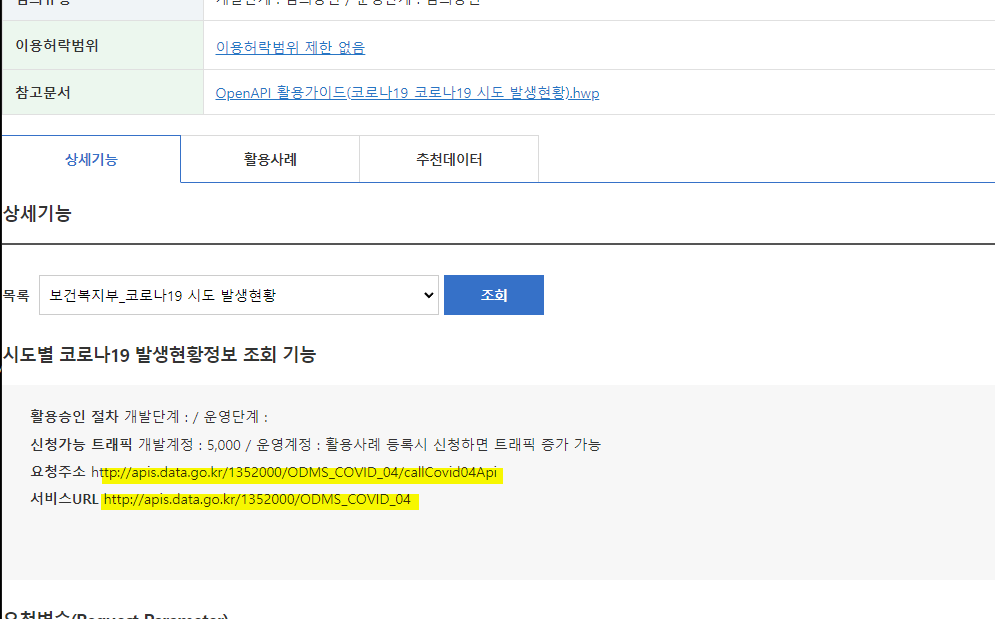

In [23]:
url = 'http://apis.data.go.kr/1352000/ODMS_COVID_04/callCovid04Api'
service_key = 'VqJLPgDfOUAcrj39LVDIRFBxHaVxxHH5evGi8h5tzgWfKHTfGzpiiASojBp23VlHpqvH%2B8RfCeylzXeIxwLEyA%3D%3D'
file_dir = '/corona_data/patient/' # 지금 api로 가져오는 데이터를 여기에 밀어넣을것이다.

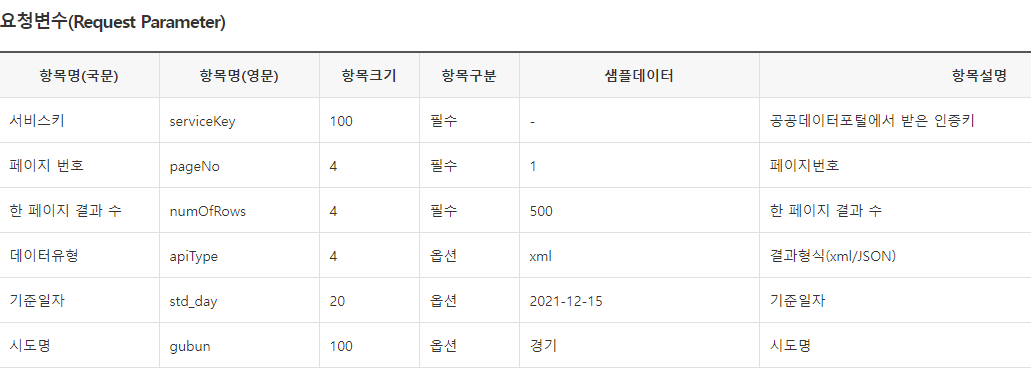

In [24]:
# std_day : 오늘부터 얼마나 이전 데이터인지 나타냄, 0 : 당일 / 1 : 어제 / 365 : 1년전
def create_param(std_day) : 
    return {'serviceKey' : service_key
            ,'pageNo' : 1
            ,'numOfRows' : '500'
            ,'apiType' : 'JSON'
            ,'std_day' : cal_std_day(std_day)}

In [25]:
create_param(365)

{'serviceKey': 'VqJLPgDfOUAcrj39LVDIRFBxHaVxxHH5evGi8h5tzgWfKHTfGzpiiASojBp23VlHpqvH%2B8RfCeylzXeIxwLEyA%3D%3D',
 'pageNo': 1,
 'numOfRows': '500',
 'apiType': 'JSON',
 'std_day': '2022-12-27'}

### 수집관련 코드
- 얘들도 함수로 구성이 필요하다

In [26]:
# for i in range(365,367) : # 이틀치 가져오기
#     params = create_param(i) # api 요청 파라미터 생성
#     log_dict={
#         "is_sucess":"Fail"
#        ,"type":"corona_patient"
#        ,"std_day":params['std_day']
#        ,"params" :params
#     }
#     try:
#         res = executeRestApi('get', url,{}, params) # 공공데이터 api에서 data 추출
#         file_name='corona_patient_'+cal_std_day(i)+'.json' # 저장 파일명 생성
#         client.write(file_dir+file_name,res,encoding='utf=8') # hdfs에 저장
#     except Exception as e :
#         log_dict['err_msg']= e.__str__() # Exception객체 내 에러메시지를 반환해서 로그에추가
#         log_json = json.dumps(log_dict, ensure_ascill=False) # json형태로 기록
#         co_logger.error(log_json) # 파라미터에 들어온 문자열을 로그에 기록하는 함수
        

## 코로나 백신 접종 현황 데이터
#### 보건 복지부 제공 웹페이지 통해서 데이터 수집 후 hdfs에 저장
1. 일간 코로나 발생 데이터(전국)
- 매일 업로드되고 있기때문에 가능

## 웹크롤링 hdfs 저장
- 예방접종 현황(백신 접종 현황)
- JSON 형태로 구성 후 HDFS에 저장

In [29]:
# pip install BeautifulSoup4
from bs4 import BeautifulSoup

In [30]:
url = 'https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000'

In [31]:
response = executeRestApi('get', url,{},{})
response

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n    <!DOCTYPE html>\r\n\r\n\r\n\r\n\r\n<html lang="ko">\r\n<head>\r\n<title>질병관리청 코로나19 백신 및 예방접종 : National Center for Mental Health</title>\r\n<meta charset="UTF-8" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\r\n<meta name="referrer" content="strict-origin-when-cross-origin"/>\r\n<!-- https를 사용하여 웹사이트가 같을 때는 전체주소, 다를 때는 도메인 주소만 남긴다.\r\nhttp를 사용하는 웹사이트에는 주소를 남기지 않는다. -->\r\n<meta name="viewport" content="width=device-width,initial-scale=1.0,minimum-scale=1.0,user-scalable=yes" />\r\n\r\n\t<meta name="author" content="코로나19 백신 및 예방접종">\r\n\t<meta name="keywords" content="코로나19 백신 및 예방접종, 백신, 접종, 백신접종, 백신허가, 예방접종, 코로나백신, 코로나-19백신, 코로나접종, 코로나예방접종, 질병청, 질병관리청">\r\n\t<meta name="description" content="질병관리청 코로나19 백신 및 예방접종 정보안내" >\r\n\t<meta name="copyright" content="질병관리청 코로나19 백신 및 예방접종 : National Center for Mental Health">\r\n\r\n\t<meta property="og:url" content="http://ncv.kdca.go.kr">\r\n\t<meta property="o

In [32]:
soup=BeautifulSoup(response,'html.parser')

In [35]:
# 가져올 것 웹에서 우클복사(셀렉터)
#content > div.data_table.tbl_scrl_mini > table > tbody > tr:nth-child(1)
# 이중 모든 값 이니까 뒤에꺼 떼
#content > div.data_table.tbl_scrl_mini > table > tbody > tr

In [36]:
trs=soup.select('#content > div.data_table.tbl_scrl_mini > table > tbody > tr')

In [37]:
len(trs)
trs

[<tr>
 <th scope="row">전국</th>
 <td class="ta_r">8,100</td>
 <td class="ta_r">3,914,225</td>
 <td class="ta_r">40.1%</td>
 </tr>,
 <tr>
 <th scope="row">서울</th>
 <td class="ta_r">1,622</td>
 <td class="ta_r">690,818</td>
 <td class="ta_r">39.8%</td>
 <!-- <td class="ta_r">0</td>
                 <td class="ta_r">0</td>
                 <td class="ta_r">39.8%</td>
                 <td class="ta_r">0</td>
                 <td class="ta_r">0</td>
                 <td class="ta_r"></td> -->
 </tr>,
 <tr>
 <th scope="row">부산</th>
 <td class="ta_r">536</td>
 <td class="ta_r">273,459</td>
 <td class="ta_r">36.5%</td>
 <!--  <td class="ta_r">0</td>
                 <td class="ta_r">0</td>
                 <td class="ta_r">36.5%</td>
                 <td class="ta_r">0</td>
                 <td class="ta_r">0</td>
                 <td class="ta_r"></td> -->
 </tr>,
 <tr>
 <th scope="row">대구</th>
 <td class="ta_r">386</td>
 <td class="ta_r">151,243</td>
 <td class="ta_r">32.2%</td>
 <!-- <td cla

In [39]:
# 위에서 확인한 필요한 데이터
 # <th scope="row">서울</th>
 # <td class="ta_r">1,622</td> #신규
 # <td class="ta_r">690,818</td> #누적
 # <td class="ta_r">39.8%</td> # 접종률

In [40]:
cols=['loc','new','accumulate','rate']
data=[]# 전국 데이터가 key-value dict으로 지정 

In [41]:
for idx, tr in enumerate(trs) : 
    if idx==0 : 
        continue # idx 0번 데이터는 전국 데이터 제외해야 하므로 continue
    tuple_t=[] # 한 지역 데이터 추출 후 저장
    # 지역명
    loc_th=tr.find('th')
    # 접종관련 데이터들
    tds = tr.select('td')
    # 지역이름 추가
    tuple_t.append(loc_th.text) # 지역
    # 접종관련 데이터 추가
    tuple_t.append(tds[0].text.replace(' ','').replace('\r\n','').replace(',',''))#신규접종
    tuple_t.append(tds[1].text.replace(' ','').replace('\r\n','').replace(',',''))#누적접종
    tuple_t.append(tds[2].text.replace(' ','').replace('\r\n','').replace(',',''))#접종률

    data.append(dict(zip(cols,tuple_t))) # 위에서 만든 cols가 키가 되고 튜플에 
#순서에 맞게 추가한 것들이 value가됨

In [42]:
# json으로 밀어넣기 위한 결과가 나오게 된다.
data

[{'loc': '서울', 'new': '1622', 'accumulate': '690818', 'rate': '39.8%'},
 {'loc': '부산', 'new': '536', 'accumulate': '273459', 'rate': '36.5%'},
 {'loc': '대구', 'new': '386', 'accumulate': '151243', 'rate': '32.2%'},
 {'loc': '인천', 'new': '463', 'accumulate': '199451', 'rate': '40%'},
 {'loc': '광주', 'new': '163', 'accumulate': '109960', 'rate': '46.7%'},
 {'loc': '대전', 'new': '144', 'accumulate': '104022', 'rate': '42.2%'},
 {'loc': '울산', 'new': '182', 'accumulate': '66403', 'rate': '37.6%'},
 {'loc': '세종', 'new': '78', 'accumulate': '18426', 'rate': '43.1%'},
 {'loc': '경기', 'new': '1603', 'accumulate': '865601', 'rate': '40.7%'},
 {'loc': '강원', 'new': '324', 'accumulate': '142146', 'rate': '38.6%'},
 {'loc': '충북', 'new': '288', 'accumulate': '142923', 'rate': '42.7%'},
 {'loc': '충남', 'new': '324', 'accumulate': '190390', 'rate': '41.6%'},
 {'loc': '전북', 'new': '368', 'accumulate': '197658', 'rate': '46.4%'},
 {'loc': '전남', 'new': '407', 'accumulate': '228923', 'rate': '48.2%'},
 {'loc': 

In [44]:
# json으로 밀어넣기위해 추가해야 할게 더 있다. (설명 등)

In [47]:
# json에 포함시킬 meta data 구성
res = {
        'meta':{
            'desc':'지역별 코로나 예방접종 인구 현황',
            'cols':{
                'loc':'지역'
                ,'new':'신규접종'
                ,'accumulate':'누적접종' 
               ,'rate' : '접종률'
                  },
            'stdDay':cal_std_day(6)
        }, # meta데이터에 데이터에 대한 설명을 넣는다.
        'data':data #value에 data를 통채로 넣는다. 리스트형태로 data라는 calue를 가지게됨
}
res

{'meta': {'desc': '지역별 코로나 예방접종 인구 현황',
  'cols': {'loc': '지역', 'new': '신규접종', 'accumulate': '누적접종', 'rate': '접종률'},
  'stdDay': '2023-12-21'},
 'data': [{'loc': '서울',
   'new': '1622',
   'accumulate': '690818',
   'rate': '39.8%'},
  {'loc': '부산', 'new': '536', 'accumulate': '273459', 'rate': '36.5%'},
  {'loc': '대구', 'new': '386', 'accumulate': '151243', 'rate': '32.2%'},
  {'loc': '인천', 'new': '463', 'accumulate': '199451', 'rate': '40%'},
  {'loc': '광주', 'new': '163', 'accumulate': '109960', 'rate': '46.7%'},
  {'loc': '대전', 'new': '144', 'accumulate': '104022', 'rate': '42.2%'},
  {'loc': '울산', 'new': '182', 'accumulate': '66403', 'rate': '37.6%'},
  {'loc': '세종', 'new': '78', 'accumulate': '18426', 'rate': '43.1%'},
  {'loc': '경기', 'new': '1603', 'accumulate': '865601', 'rate': '40.7%'},
  {'loc': '강원', 'new': '324', 'accumulate': '142146', 'rate': '38.6%'},
  {'loc': '충북', 'new': '288', 'accumulate': '142923', 'rate': '42.7%'},
  {'loc': '충남', 'new': '324', 'accumulate': '19039

In [46]:
# # 밀어넣기 코드임 한번 실행해서 이미 파일 존재
# file_dir='/corona_data/vaccine/'
# file_name='corona_vaccine_'+cal_std_day(6)+'.json'
# client.write(file_dir+file_name,json.dumps(res,ensure_ascii=False),encoding='utf=8')

In [48]:
# 밀어넣은것 확인해보기. read
file_dir='/corona_data/vaccine/'
file_name='corona_vaccine_'+cal_std_day(6)+'.json'
vaccine=spark.read.json(file_dir+file_name)
vaccine.show()

+----------------------+------------------------------+
|                  data|                          meta|
+----------------------+------------------------------+
|[{688448, 서울, 152...|{{누적접종, 지역, 신규접종,...|
+----------------------+------------------------------+



### 위 크롤링된 데이터가 전 연령에 대한 백신 관련 데이터가 아니므로 다른 파일 사용

In [49]:
import pandas as pd

In [50]:
fin_vac = pd.read_csv('./data/corona_data/코로나백신접종완료_2022_12.csv',index_col=0)

In [56]:
fin_vac.head()

,LOC,V1,V2,V3
0,제주,591058,585437.0,439106.0
1,서울,8335298,8257768.0,6076429.0
2,부산,2879900,2851362.0,2140773.0
3,대구,2018604,1995783.0,1405163.0
4,광주,1261981,1250568.0,968947.0


In [53]:
# row 예시
tmp = fin_vac.loc[4]
tmp

LOC           광주
V1       1261981
V2     1250568.0
V3      968947.0
Name: 4, dtype: object

In [64]:
cols=['loc','v1','v2','v3']
data=[]      

In [57]:
fin_vac.index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [58]:
for idx in fin_vac.index : 
    tuple_t = []
    tmp = fin_vac.loc[idx]
    tuple_t.append(str(tmp.LOC))
    tuple_t.append(str(tmp.V1))
    tuple_t.append(str(tmp.V2))
    tuple_t.append(str(tmp.V3))
    data.append(dict(zip(cols,tuple_t)))

In [59]:
data

[{'loc': '서울', 'new': '1622', 'accumulate': '690818', 'rate': '39.8%'},
 {'loc': '부산', 'new': '536', 'accumulate': '273459', 'rate': '36.5%'},
 {'loc': '대구', 'new': '386', 'accumulate': '151243', 'rate': '32.2%'},
 {'loc': '인천', 'new': '463', 'accumulate': '199451', 'rate': '40%'},
 {'loc': '광주', 'new': '163', 'accumulate': '109960', 'rate': '46.7%'},
 {'loc': '대전', 'new': '144', 'accumulate': '104022', 'rate': '42.2%'},
 {'loc': '울산', 'new': '182', 'accumulate': '66403', 'rate': '37.6%'},
 {'loc': '세종', 'new': '78', 'accumulate': '18426', 'rate': '43.1%'},
 {'loc': '경기', 'new': '1603', 'accumulate': '865601', 'rate': '40.7%'},
 {'loc': '강원', 'new': '324', 'accumulate': '142146', 'rate': '38.6%'},
 {'loc': '충북', 'new': '288', 'accumulate': '142923', 'rate': '42.7%'},
 {'loc': '충남', 'new': '324', 'accumulate': '190390', 'rate': '41.6%'},
 {'loc': '전북', 'new': '368', 'accumulate': '197658', 'rate': '46.4%'},
 {'loc': '전남', 'new': '407', 'accumulate': '228923', 'rate': '48.2%'},
 {'loc': 

In [60]:
# json에 포함시킬 meta data 구성
res = {
        'meta':{
            'desc':'지역별 코로나 예방접종 인구 현황',
            'cols':{
                'loc':'지역'
                ,'v1':'1차접종누적'
                ,'v2':'2차접종누적' 
               ,'v3' : '3차접종누적'
                  },
            'stdDay':cal_std_day(365)
        },
        'data':data
}
res

{'meta': {'desc': '지역별 코로나 예방접종 인구 현황',
  'cols': {'loc': '지역', 'v1': '1차접종누적', 'v2': '2차접종누적', 'v3': '3차접종누적'},
  'stdDay': '2022-12-27'},
 'data': [{'loc': '서울',
   'new': '1622',
   'accumulate': '690818',
   'rate': '39.8%'},
  {'loc': '부산', 'new': '536', 'accumulate': '273459', 'rate': '36.5%'},
  {'loc': '대구', 'new': '386', 'accumulate': '151243', 'rate': '32.2%'},
  {'loc': '인천', 'new': '463', 'accumulate': '199451', 'rate': '40%'},
  {'loc': '광주', 'new': '163', 'accumulate': '109960', 'rate': '46.7%'},
  {'loc': '대전', 'new': '144', 'accumulate': '104022', 'rate': '42.2%'},
  {'loc': '울산', 'new': '182', 'accumulate': '66403', 'rate': '37.6%'},
  {'loc': '세종', 'new': '78', 'accumulate': '18426', 'rate': '43.1%'},
  {'loc': '경기', 'new': '1603', 'accumulate': '865601', 'rate': '40.7%'},
  {'loc': '강원', 'new': '324', 'accumulate': '142146', 'rate': '38.6%'},
  {'loc': '충북', 'new': '288', 'accumulate': '142923', 'rate': '42.7%'},
  {'loc': '충남', 'new': '324', 'accumulate': '190390', 

In [68]:
# # 밀어넣기. 한번실행했음
# file_dir='/corona_data/vaccine/'
# file_name='corona_vaccine_'+cal_std_day(365)+'.json'
# client.write(file_dir+file_name,json.dumps(res,ensure_ascii=False),encoding='utf=8')

In [62]:
# 읽어오기
file_dir='/corona_data/vaccine/'
file_name='corona_vaccine_'+cal_std_day(365)+'.json'
vaccine=spark.read.json(file_dir+file_name)
vaccine.show()

+----------------------+-----------------------------+
|                  data|                         meta|
+----------------------+-----------------------------+
|[{제주, 591058, 585...|{{지역, 1차접종누적, 2차접...|
+----------------------+-----------------------------+



### 웹 데이터를 수집하고 json 형식으로 처리해서 HDFS에 저장하는 과정을 한 것이다.